# Practice 7

## Problem 0 

Normalize spectra of PbS quantum dots.

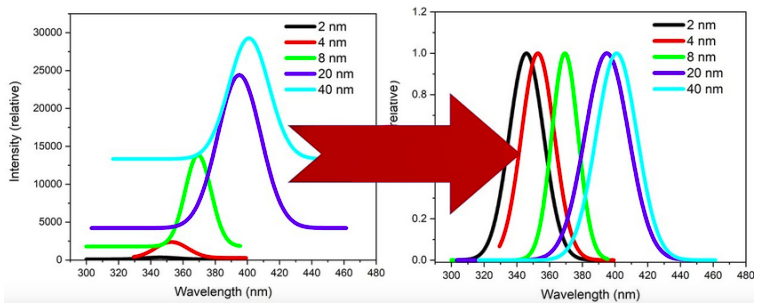

Plot all spectra from folder ./practice_7_data/NL_8types.

Use filename to set labels in the plot.

Sort the data by wavelength increase in the file name.

['1000.arc_data', '1170.arc_data', '1750.arc_data', '1320.arc_data', '1600.arc_data', '1060.arc_data', '925.arc_data', '850.arc_data']
['850.arc_data', '925.arc_data', '1000.arc_data', '1060.arc_data', '1170.arc_data', '1320.arc_data', '1600.arc_data', '1750.arc_data']


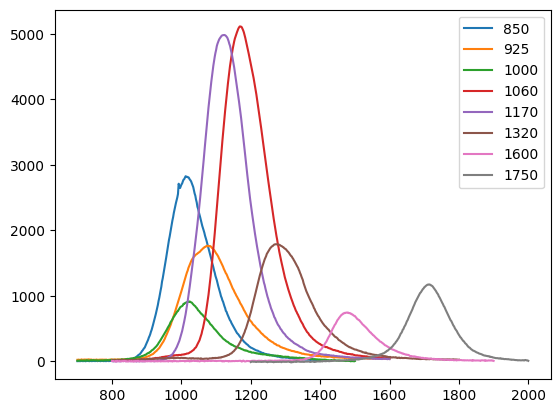

In [30]:
import os
import matplotlib.pyplot as plt
import numpy as np

def str2int(s):
    return int(s.split(sep='.')[0])

path = './practice_7_data/NL_8types/' 
#filelist = [f for f in os.listdir(path)]
filelist = [f for f in os.listdir(path) if os.path.isfile(path + f)]
# filelist = os.listdir(path) # if you need a folders also
print(filelist)
#filelist = filelist.sort()
filelist.sort(key=str2int)
print(filelist)

lst = []

for name in filelist: # 
    data = np.loadtxt(path + name, encoding='Windows-1251') 
    lst.append(data)
    a=name.split(sep='.')
    plt.plot(data[:,0], data[:,1], label=a[0])

plt.legend()
plt.show()


## Problem 1

Advice: use results of prevoius practice.

1. Open Royal Blue, 280nm and 370 nm LED data (path is ./practice_7_data/3LEDs), plot them.
2. Select correct data (without saturation), average and normalize spectra.
3. Plot averaged normalized spectra and save them into a file

Yesterday's result for 370 and 280 nm LED:

(301, 7)


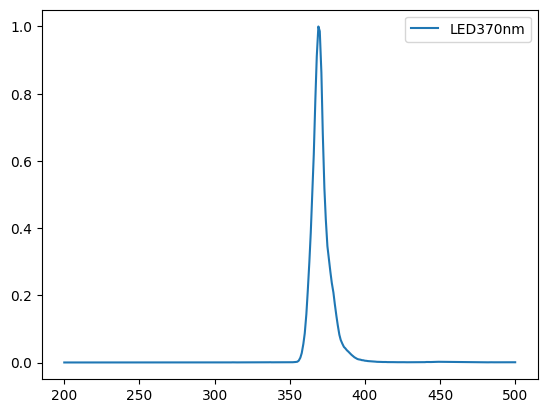

In [62]:
path = './practice_6_data/3LEDs/'
filename = 'LED370nm.csv'


txt_data = np.loadtxt(path + filename, skiprows=3, delimiter=',', max_rows=301)

print(np.shape(txt_data))
np.shape(txt_data)
'''
for i in range(4, np.shape(txt_data)[1]):
    plt.plot(txt_data[: , 0], txt_data[: , i], label=i)
'''
accum = np.zeros_like(txt_data[: , 0])
for i in range(4, np.shape(txt_data)[1]):
    accum += txt_data[: , i]

accum /= 3

#plt.plot(accum[:,0],accum[:,1]/np.max(accum[:,1]
plt.plot(txt_data[:,0],accum/np.max(accum), label='LED370nm')

LED370nm = accum/np.max(accum)
LED370nm_x= txt_data[:,0]

#print(txt_data[: , 4:])
plt.legend()
plt.show()

range(1, 11)


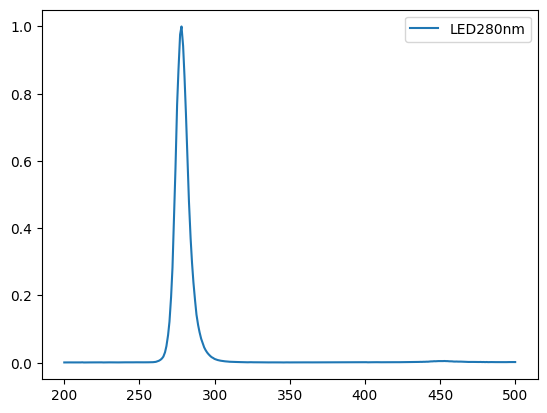

In [64]:
path = './practice_6_data/3LEDs/'
filename = 'LED280nm.csv'


txt_data = np.loadtxt(path + filename, skiprows=2, delimiter=',', max_rows=301, usecols=([0] + list(range(1, 20, 2))))

#print(np.shape(txt_data))
np.shape(txt_data)
'''
for i in range(1, np.shape(txt_data)[1]):
    plt.plot(txt_data[: , 0], txt_data[: , i], label=i)
'''

print(range(1, np.shape(txt_data)[1]))

accum = np.zeros_like(txt_data[: , 0])
for i in range(1, np.shape(txt_data)[1]):
    if i!=5 and i!=6:
        accum += txt_data[: , i]


plt.plot(txt_data[:,0],accum/np.max(accum), label='LED280nm')

LED280nm = accum/np.max(accum)
LED280nm_x= txt_data[:,0]
'''
- add labels
- choose normal curves
- average-normalize
'''

plt.legend()

plt.show()

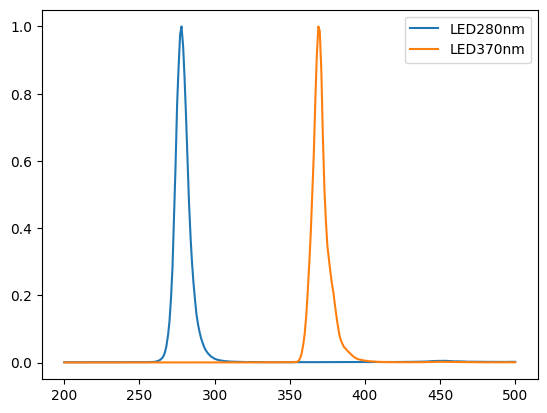

In [67]:
#LED280nm
#LED370nm

plt.plot(LED280nm_x, LED280nm,label='LED280nm' )
plt.plot(LED370nm_x, LED370nm,label='LED370nm')
plt.legend()
plt.show()

Try to rewrite code into a functions and call them in a loop for all samples.

## Problem 2

1. Open all files from CCD folders (there are background noise data recorded at different temperatures), plot them.
2. Calculate average and RMS.
3. Plot dependences of average and RMS from temperature. Can you offer a function to fit data?

Hint: use a results from the previus practice.

#### Info

The noise of optical detectors (including CCDs) depends on temperature. Usually noise increases with increasing temperature, so receivers are often cooled.
The CCD in the example is usually cooled down to -70C.
The matrix itself has a size of 1024$\times$128 elements, but averaging "by columns" gives an one-dimensional array of 1024$\times$1.

This is a background noise measurement, not a spectral one, and we do not need to use wavelength. Use the numbers of the matrix elements only (corresponding to the line number in the file).

Previous results:

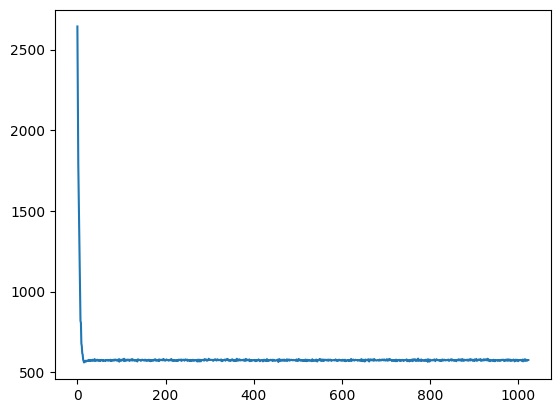

In [30]:
path = './practice_6_data/ascii_vs_binary/'
filename_bin = '-60 30 sec.dat'
filename_txt = 'ccd -60C.asc'


txt_data = np.loadtxt(path + filename_txt)

plt.plot(txt_data[: , 1])
plt.show()

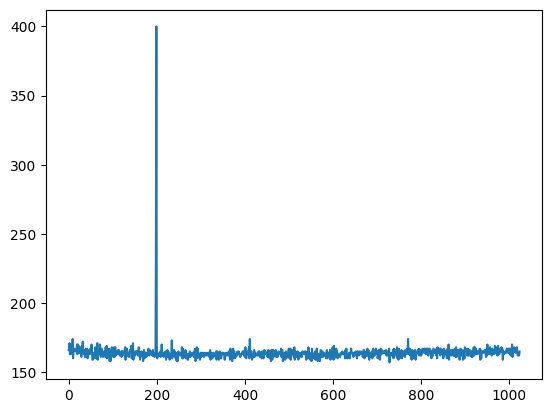

In [41]:
with open(path + filename_bin, 'rb') as file:
    raw_str = file.read()

#print(raw_str)

spectrum = []

for i in range(len(raw_str)//2):
    dbyte = raw_str[i*2 : i*2 + 2]
    int1 = int.from_bytes(dbyte, 'little') 
    spectrum.append(int1)

plt.plot(spectrum)
plt.show()